In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
%matplotlib inline

def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)

def bias_variable(shape, name):
    return tf.Variable(tf.zeros(shape = shape), name)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
batch_size=256
g_dim=128

x_d=tf.placeholder(tf.float32,shape=[None,784])
x_g=tf.placeholder(tf.float32,shape=[None,128])

weights={
    "w_d1": weight_variable([784,128],"w_d1"),
    "w_d2": weight_variable([128,1],"w_d2"),
    "w_g1": weight_variable([128,256],"w_g1"),
    "w_g2": weight_variable([256,784],"w_g2")
}

biases={
    "b_d1": bias_variable([128],"b_d1"),
    "b_d2": bias_variable([1],"b_d2"),
    "b_g1": bias_variable([256],"b_g1"),
    "b_g2": bias_variable([784],"b_g2")
}

var_d=[weights["w_d1"],weights["w_d2"],biases["b_d1"],biases["b_d2"]]
var_g=[weights["w_g1"],weights["w_g2"],biases["b_g1"],biases["b_g2"]]

In [6]:
def generator(z):
    h_g1 = tf.nn.relu(tf.add(tf.matmul(z,weights["w_g1"]),biases["b_g1"]))
    h_g2 = tf.nn.sigmoid(tf.add(tf.matmul(h_g1,weights["w_g2"]),biases["b_g2"]))
    return h_g2

def discriminator(x):
    h_d1 = tf.nn.relu(tf.add(tf.matmul(x,weights["w_d1"]),biases["b_d1"]))
    h_d2 = tf.nn.sigmoid(tf.add(tf.matmul(h_d1,weights["w_d2"]),biases["b_d2"]))
    return h_d2

def sample_Z(m,n):
    return np.random.uniform(-1.,1.,size=[m,n])

g_sample=generator(x_g)
d_real=discriminator(x_d)
d_fake=discriminator(g_sample)

d_loss=-tf.reduce_mean(tf.log(d_real)+tf.log(1.-d_fake))
g_loss=-tf.reduce_mean(tf.log(d_fake))

In [7]:
#只更新discriminator
d_optimizer=tf.train.AdamOptimizer(0.0005).minimize(d_loss,var_list=var_d)
#只更新generator
g_optimizer=tf.train.AdamOptimizer(0.0001).minimize(g_loss,var_list=var_g)


def plot(samples):
    fig=plt.figure(figsize=(4,4))
    gs=gridspec.GridSpec(4,4)
    gs.update(wspace=0.05,hspace=0.05)
    for i, sample in enumerate(samples):
        ax=plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28,28),cmap='gray')
    plt.show()


step 0, discriminator loss 1.66271 generator loss 0.86538


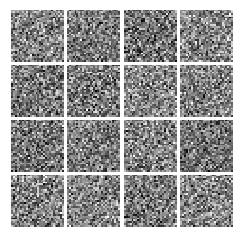

step 100, discriminator loss 0.01005 generator loss 5.81985
step 200, discriminator loss 0.00460 generator loss 6.90008
step 300, discriminator loss 0.00361 generator loss 7.40223
step 400, discriminator loss 0.00709 generator loss 7.20803
step 500, discriminator loss 0.05892 generator loss 5.14662
step 600, discriminator loss 0.11334 generator loss 4.45470
step 700, discriminator loss 0.05093 generator loss 4.88418
step 800, discriminator loss 0.04037 generator loss 4.61736
step 900, discriminator loss 0.02803 generator loss 4.61942
step 1000, discriminator loss 0.02562 generator loss 4.89657


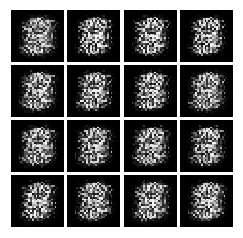

step 2000, discriminator loss 0.06075 generator loss 4.52924


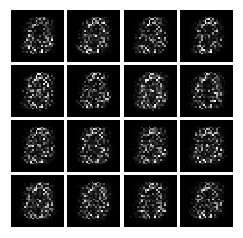

step 3000, discriminator loss 0.00713 generator loss 6.38448
step 4000, discriminator loss 0.04118 generator loss 6.56646


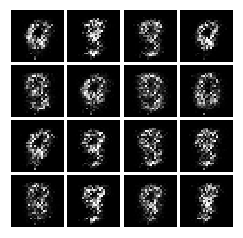

step 5000, discriminator loss 0.02593 generator loss 6.50597
step 6000, discriminator loss 0.03870 generator loss 7.51945


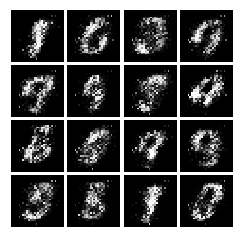

step 7000, discriminator loss 0.03110 generator loss 7.67904
step 8000, discriminator loss 0.05753 generator loss 7.12855


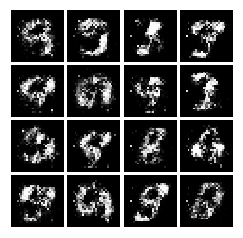

step 9000, discriminator loss 0.08166 generator loss 7.11479
step 10000, discriminator loss 0.08456 generator loss 7.31823


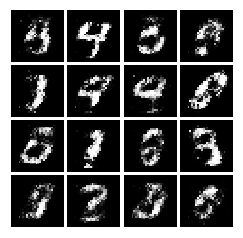

step 11000, discriminator loss 0.12449 generator loss 6.61184
step 12000, discriminator loss 0.18760 generator loss 5.89642


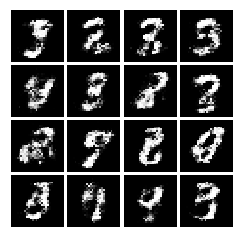

step 13000, discriminator loss 0.14482 generator loss 5.97573
step 14000, discriminator loss 0.12744 generator loss 5.91907


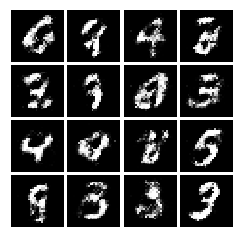

step 15000, discriminator loss 0.21172 generator loss 5.86160
step 16000, discriminator loss 0.19742 generator loss 4.98282


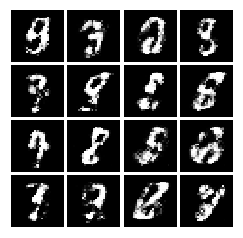

step 17000, discriminator loss 0.15526 generator loss 5.70607
step 18000, discriminator loss 0.23583 generator loss 5.43852


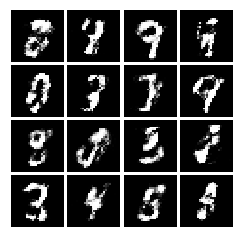

step 19000, discriminator loss 0.28602 generator loss 4.84101
step 20000, discriminator loss 0.25428 generator loss 4.98020


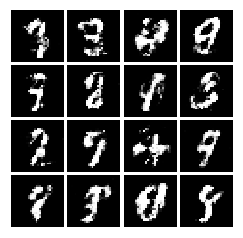

In [8]:
sess=tf.InteractiveSession()
init_op=tf.global_variables_initializer()
sess.run(init_op)
for step in range(20001):
    batch_x=mnist.train.next_batch(batch_size)[0]
    _,d_loss_train = sess.run([d_optimizer,d_loss],feed_dict={x_d:batch_x,x_g: sample_Z(batch_size,g_dim)})
    _,g_loss_train = sess.run([g_optimizer,g_loss],feed_dict={x_g: sample_Z(batch_size,g_dim)})
    
    if step<=1000:
        if step % 100==0:
            print("step %d, discriminator loss %.5f" % (step,d_loss_train)),
            print("generator loss %.5f" % (g_loss_train))
        if step % 1000==0:
            g_sample_plot =g_sample.eval(feed_dict={x_g:sample_Z(16,g_dim)})
            plot(g_sample_plot)
    else:
        if step % 1000==0:
            print("step %d, discriminator loss %.5f" % (step,d_loss_train)),
            print("generator loss %.5f" % (g_loss_train))
        if step % 2000==0:
            g_sample_plot=g_sample.eval(feed_dict={x_g:sample_Z(16,g_dim)})
            plot(g_sample_plot)